In [1]:

import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('../Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



../Data\Fake.csv
../Data\True.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk
import string

fake_df = pd.read_csv("../Data/Fake.csv")
true_df = pd.read_csv("../Data/True.csv")

fake_df["label"] = 0
true_df["label"] = 1

merged_news = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)


In [5]:

fake_df= fake_df[["title", "text"]]
true_df = true_df[["title", "text"]]

In [6]:
data = pd.concat([fake_df, true_df]).sample(frac=1, random_state=42)

In [7]:
# Drop missing rows
data = data.dropna()

In [8]:
print("Cleaned dataset shape:", data.shape)

Cleaned dataset shape: (44898, 2)


In [9]:
merged_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [10]:
def remove_punct(text):
    return "".join([char for char in text if char not in string.punctuation])

merged_news['text_clean'] = merged_news['text'].apply(lambda x: remove_punct(x.lower()))
merged_news.head()

,title,text,subject,date,label,text_clean
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump just couldn t wish all americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,on friday it was revealed that former milwauke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,on christmas day donald trump announced that h...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis used his annual christmas day mes...


In [11]:
from nltk.tokenize import word_tokenize

merged_news['text_tokens'] = merged_news['text_clean'].apply(word_tokenize)
merged_news.head()


,title,text,subject,date,label,text_clean,text_tokens
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump just couldn t wish all americans ...,"[donald, trump, just, couldn, t, wish, all, am..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,house intelligence committee chairman devin nu...,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,on friday it was revealed that former milwauke...,"[on, friday, it, was, revealed, that, former, ..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,on christmas day donald trump announced that h...,"[on, christmas, day, donald, trump, announced,..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis used his annual christmas day mes...,"[pope, francis, used, his, annual, christmas, ..."


In [12]:
import nltk
from nltk.corpus import stopwords

stopwords_En = stopwords.words('english')

merged_news['text_tokens'] = merged_news['text_tokens'].apply(lambda tokens: [word for word in tokens if word not in stopwords_En])
merged_news.head()


,title,text,subject,date,label,text_clean,text_tokens
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump just couldn t wish all americans ...,"[donald, trump, wish, americans, happy, new, y..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,house intelligence committee chairman devin nu...,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,on friday it was revealed that former milwauke...,"[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,on christmas day donald trump announced that h...,"[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis used his annual christmas day mes...,"[pope, francis, used, annual, christmas, day, ..."


In [13]:
from nltk.stem import WordNetLemmatizer

wn = WordNetLemmatizer()

merged_news['text_tokens'] = merged_news['text_tokens'].apply(lambda tokens: [wn.lemmatize(word) for word in tokens])
merged_news.head()


,title,text,subject,date,label,text_clean,text_tokens
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump just couldn t wish all americans ...,"[donald, trump, wish, american, happy, new, ye..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,house intelligence committee chairman devin nu...,"[house, intelligence, committee, chairman, dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,on friday it was revealed that former milwauke...,"[friday, revealed, former, milwaukee, sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,on christmas day donald trump announced that h...,"[christmas, day, donald, trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis used his annual christmas day mes...,"[pope, francis, used, annual, christmas, day, ..."


In [14]:
import pandas as pd
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Initialize lemmatizer
wn = WordNetLemmatizer()

# Lemmatization (list of tokens → lemmatized tokens)
merged_news['text_tokens'] = merged_news['text_tokens'].apply(
    lambda tokens: [wn.lemmatize(word) for word in tokens]
)

# Join tokens back into a single string for TF-IDF
merged_news['text_final'] = merged_news['text_tokens'].apply(lambda tokens: ' '.join(tokens))


In [15]:
# Vectorization on lemmatized text
tfidf = TfidfVectorizer(ngram_range=(1,1), max_features=5000)
text_tfidf = tfidf.fit_transform(merged_news['text_final']).toarray()

# Add numeric features
merged_news['body_len'] = merged_news['text'].apply(lambda x: len(x) - x.count(' '))

def count_punct_words(text):
    words = text.split()
    if len(words) == 0:
        return 0
    punct_count = sum(1 for char in text if char in string.punctuation)
    return round(punct_count / len(words), 3) * 100

merged_news['punct_per_word%'] = merged_news['text'].apply(count_punct_words)

def count_cap_words(text):
    words = text.split()
    if len(words) == 0:
        return 0
    cap_count = sum(1 for char in text if char.isupper())
    return round(cap_count / len(words), 3) * 100

merged_news['cap_per_word%'] = merged_news['text'].apply(count_cap_words)

# Combine TF-IDF with engineered features
features_df = pd.DataFrame(text_tfidf, columns=tfidf.get_feature_names_out())
features_df['body_len'] = merged_news['body_len']
features_df['punct_per_word%'] = merged_news['punct_per_word%']
features_df['cap_per_word%'] = merged_news['cap_per_word%']

# Scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features_df)

# Final DataFrame
final_df = pd.DataFrame(features_scaled, columns=features_df.columns)

final_df.head()

MemoryError: Unable to allocate 1.67 GiB for an array with shape (5003, 44898) and data type float64

Accuracy: 0.9932071269487751

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



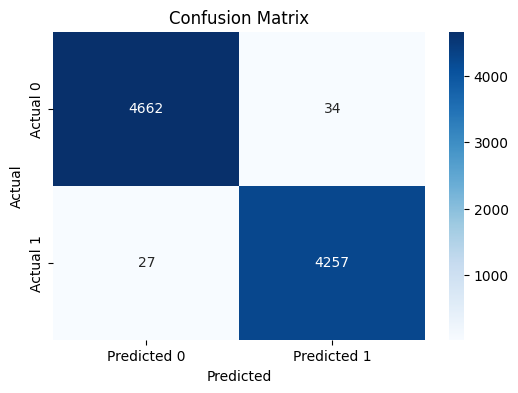

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Features and labels
X = final_df
y = merged_news['label']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



Random Forest
Accuracy: 0.9981069042316258
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



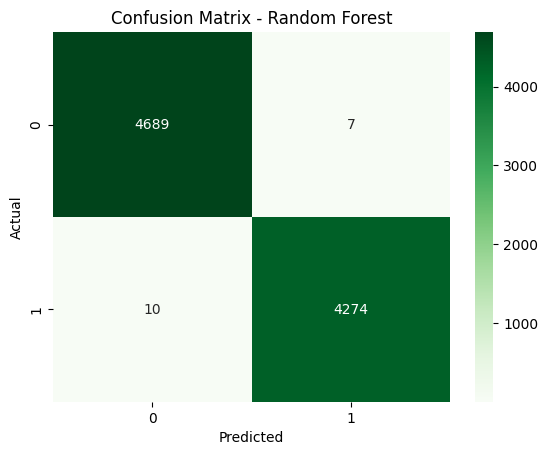

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Naive Bayes
Accuracy: 0.939977728285078
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4696
           1       0.93      0.95      0.94      4284

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



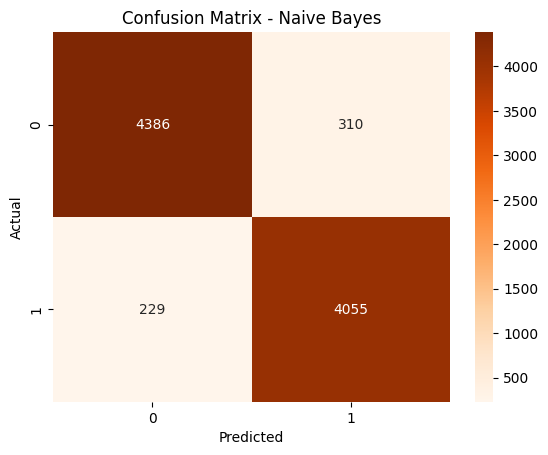

In [16]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Support Vector Machine (SVM)
Accuracy: 0.9948775055679288
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4696
           1       0.99      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



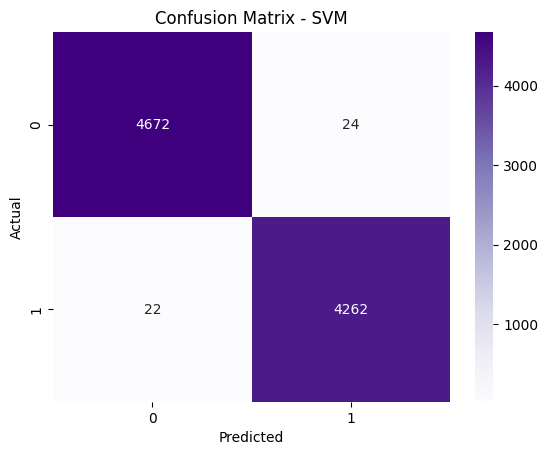

In [17]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Support Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Gradient Boosting
Accuracy: 0.9951002227171493
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4696
           1       0.99      1.00      0.99      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



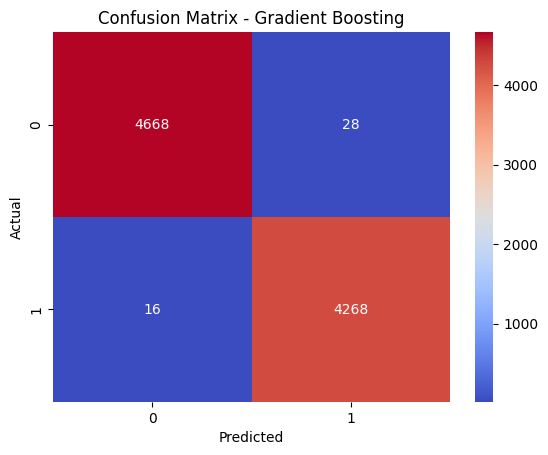

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=gb.classes_, yticklabels=gb.classes_)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
